In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

<a name="toc_40291_2"></a>
# Problem Statement

Let's use the same two data points as before - a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.


In [3]:
x_train = np.array([1.0,2.0])
y_train = np.array([300.0, 500.0])`

# Compute Cost

In [4]:
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

# Compute Gradient  
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \
\end{align}
$$


In [5]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0#deriavate
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i]) 
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

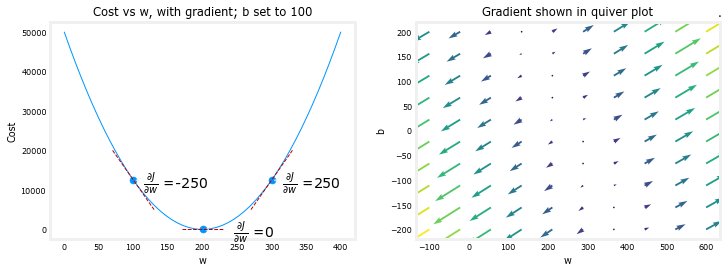

In [8]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()  

# Gradient descent  
$$\begin{align*} \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} ; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

In [11]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iters,cost_function,gradient_function):
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w , b)  
        b -= alpha * dj_db 
        w -= alpha * dj_dw
        
        if i < 100000:
            J_history.append(cost_function(x,y,w,b))
            p_history.append([w,b])
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w, b, J_history, p_history

In [13]:
w_init = 0
b_init = 0
iterations = 1000
tmp_alpha = 1.0e-2
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")  
#the cost rapidly declines
#the partial derivatives also get smaller, rapidly first then more slowly

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration  100: Cost 8.68e+01  dj_dw: -2.057e+01, dj_db: -1.111e+01   w:  1.846e+02, b: 1.12410e+02
Iteration  200: Cost 1.10e+01  dj_dw: -1.273e+00, dj_db:  7.015e-01   w:  1.907e+02, b: 1.14646e+02
Iteration  300: Cost 9.48e+00  dj_dw: -6.373e-01, dj_db:  9.896e-01   w:  1.915e+02, b: 1.13710e+02
Iteration  400: Cost 8.19e+00  dj_dw: -5.757e-01, dj_db:  9.303e-01   w:  1.921e+02, b: 1.12748e+02
Iteration  500: Cost 7.08e+00  dj_dw: -5.347e-01, dj_db:  8.651e-01   w:  1.927e+02, b: 1.11851e+02
Iteration  600: Cost 6.12e+00  dj_dw: -4.971e-01, dj_db:  8.043e-01   w:  1.932e+02, b: 1.11017e+02
Iteration  700: Cost 5.29e+00  dj_dw: -4.621e-01, dj_db:  7.477e-01   w:  1.937e+02, b: 1.10242e+02
Iteration  800: Cost 4.57e+00  dj_dw: -4.296e-01, dj_db:  6.950e-01   w:  1.941e+02, b: 1.09521e+02
Iteration  900: Cost 3.95e+00  dj_dw: -3.993e-01, dj_db:  6.461e-01   w:  1.945e+02, b: 1.08851e+02


# Cost versus iterations of gradient descent

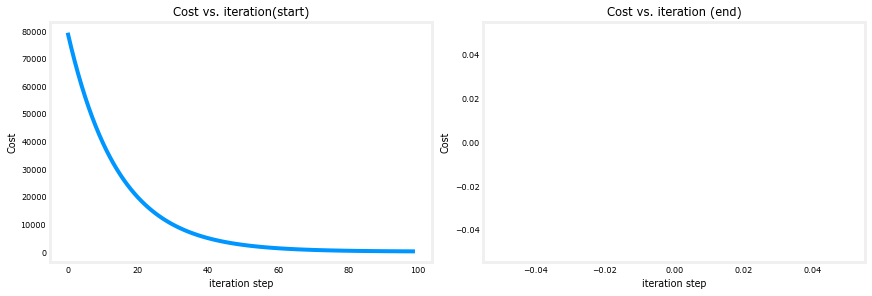

In [14]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

# Predictions

In [15]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 303.1 Thousand dollars
1200 sqft house prediction 342.1 Thousand dollars
2000 sqft house prediction 498.1 Thousand dollars


## Plotting

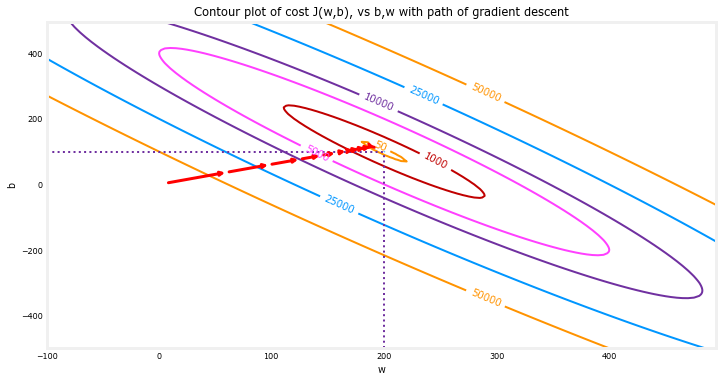

In [16]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

- The path makes steady (monotonic) progress toward its goal.
- initial steps are much larger than the steps near the goal.

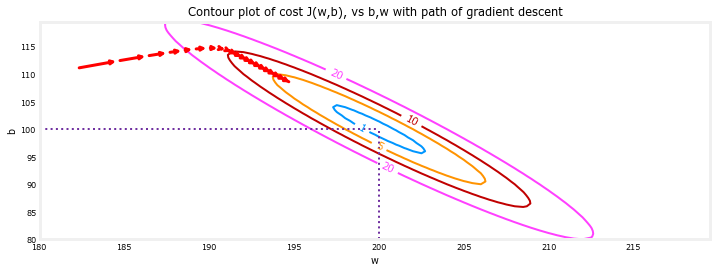

In [17]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

# Increased learning rate

In [18]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteration    0: Cost 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration    1: Cost 7.82e+05  dj_dw:  1.130e+03, dj_db:  7.000e+02   w: -3.840e+02, b:-2.40000e+02
Iteration    2: Cost 2.37e+06  dj_dw: -1.970e+03, dj_db: -1.216e+03   w:  1.192e+03, b: 7.32800e+02
Iteration    3: Cost 7.19e+06  dj_dw:  3.429e+03, dj_db:  2.121e+03   w: -1.551e+03, b:-9.63840e+02
Iteration    4: Cost 2.18e+07  dj_dw: -5.974e+03, dj_db: -3.691e+03   w:  3.228e+03, b: 1.98886e+03
Iteration    5: Cost 6.62e+07  dj_dw:  1.040e+04, dj_db:  6.431e+03   w: -5.095e+03, b:-3.15579e+03
Iteration    6: Cost 2.01e+08  dj_dw: -1.812e+04, dj_db: -1.120e+04   w:  9.402e+03, b: 5.80237e+03
Iteration    7: Cost 6.09e+08  dj_dw:  3.156e+04, dj_db:  1.950e+04   w: -1.584e+04, b:-9.80139e+03
Iteration    8: Cost 1.85e+09  dj_dw: -5.496e+04, dj_db: -3.397e+04   w:  2.813e+04, b: 1.73730e+04
Iteration    9: Cost 5.60e+09  dj_dw:  9.572e+04, dj_db:  5.916e+04   w: -4.845e+04, b:-2.99567e+04


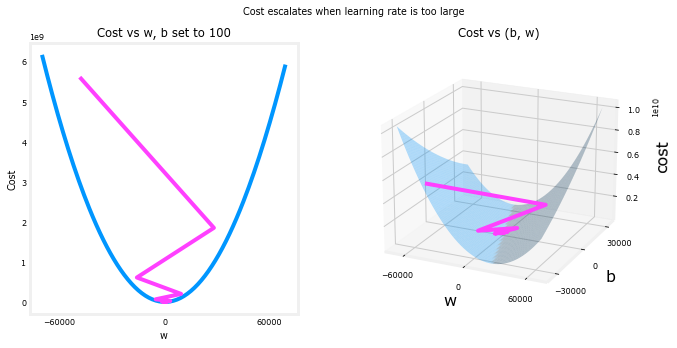

In [19]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()

Above, the left graph shows $w$'s progression over the first few steps of gradient descent. $w$ oscillates from positive to negative and cost grows rapidly. Gradient Descent is operating on both $w$ and $b$ simultaneously, so one needs the 3-D plot on the right for the complete picture.